In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn import  metrics


In [2]:
df=pd.read_csv('abalone.data',names=['sex', 'length', 'diameter', 'height','wholeweight','shuckedweight','visceraweight','shellweight','rings'])

In [3]:
df

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# basic info

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            4177 non-null   object 
 1   length         4177 non-null   float64
 2   diameter       4177 non-null   float64
 3   height         4177 non-null   float64
 4   wholeweight    4177 non-null   float64
 5   shuckedweight  4177 non-null   float64
 6   visceraweight  4177 non-null   float64
 7   shellweight    4177 non-null   float64
 8   rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [51]:
df.describe()

,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [91]:
df[df['height'] == 0]  #need to drop these rows

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,age
1257,1,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,1,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [92]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

In [63]:
num = df.select_dtypes(exclude='object')
num 

,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [64]:
cat = df.select_dtypes(include='object')
cat

,sex
0,M
1,M
2,F
3,M
4,I
...,...
4172,F
4173,M
4174,M
4175,F


# set dummies for categorical columns

In [67]:
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)

In [45]:
df.sex.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4177 entries, 0 to 4176
Series name: sex
Non-Null Count  Dtype
--------------  -----
4177 non-null   int32
dtypes: int32(1)
memory usage: 16.4 KB


# EDA

In [67]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'wholeweight', 'shuckedweight',
       'visceraweight', 'shellweight', 'rings'],
      dtype='object')

In [21]:
df.sex.value_counts()

2    1528
1    1342
0    1307
Name: sex, dtype: int64

In [69]:
df.length.value_counts()

0.625    94
0.550    94
0.575    93
0.580    92
0.600    87
         ..
0.075     1
0.815     1
0.110     1
0.150     1
0.800     1
Name: length, Length: 134, dtype: int64

# finding null values

In [15]:
df.isna().sum()

sex              0
length           0
diameter         0
height           0
wholeweight      0
shuckedweight    0
visceraweight    0
shellweight      0
age              0
dtype: int64

# adding age column by adding rings+1.5

In [65]:
df['age'] = df['rings'] + 1.5
df.head()

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


# drop rings column

In [66]:
df.drop('rings', axis = 1, inplace = True)
df.head()

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# univariate analysis

<AxesSubplot:xlabel='sex', ylabel='count'>

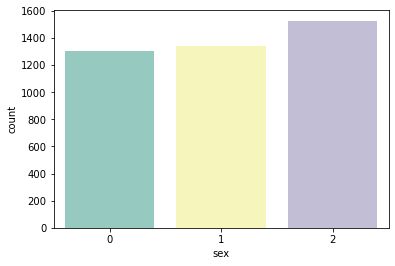

In [23]:
sns.countplot(x = 'sex', data = df, palette = 'Set3')

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

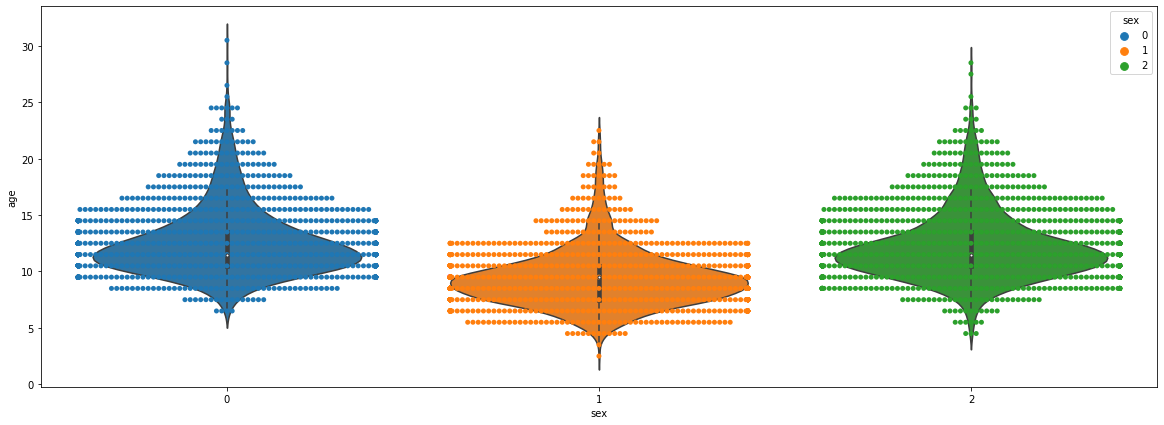

In [27]:
plt.figure(figsize = (20, 7))
sns.swarmplot(x = 'sex', y = 'age', data = df, hue = 'sex')
sns.violinplot(x = 'sex', y = 'age', data = df)

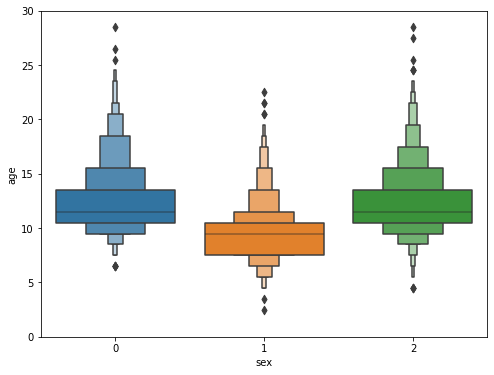

In [93]:
#categorical features
temp = pd.concat([df['age'], df['sex']], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='sex', y="age", data=df)
fig.axis(ymin=0, ymax=30);

# finding mean value of sex

In [31]:
df.groupby('sex')[['length','diameter','height','wholeweight','shuckedweight','visceraweight','shellweight','age']].mean().sort_values('age')

,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,age
sex,,,,,,,,
1,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
2,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
0,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


# multivariate analysis

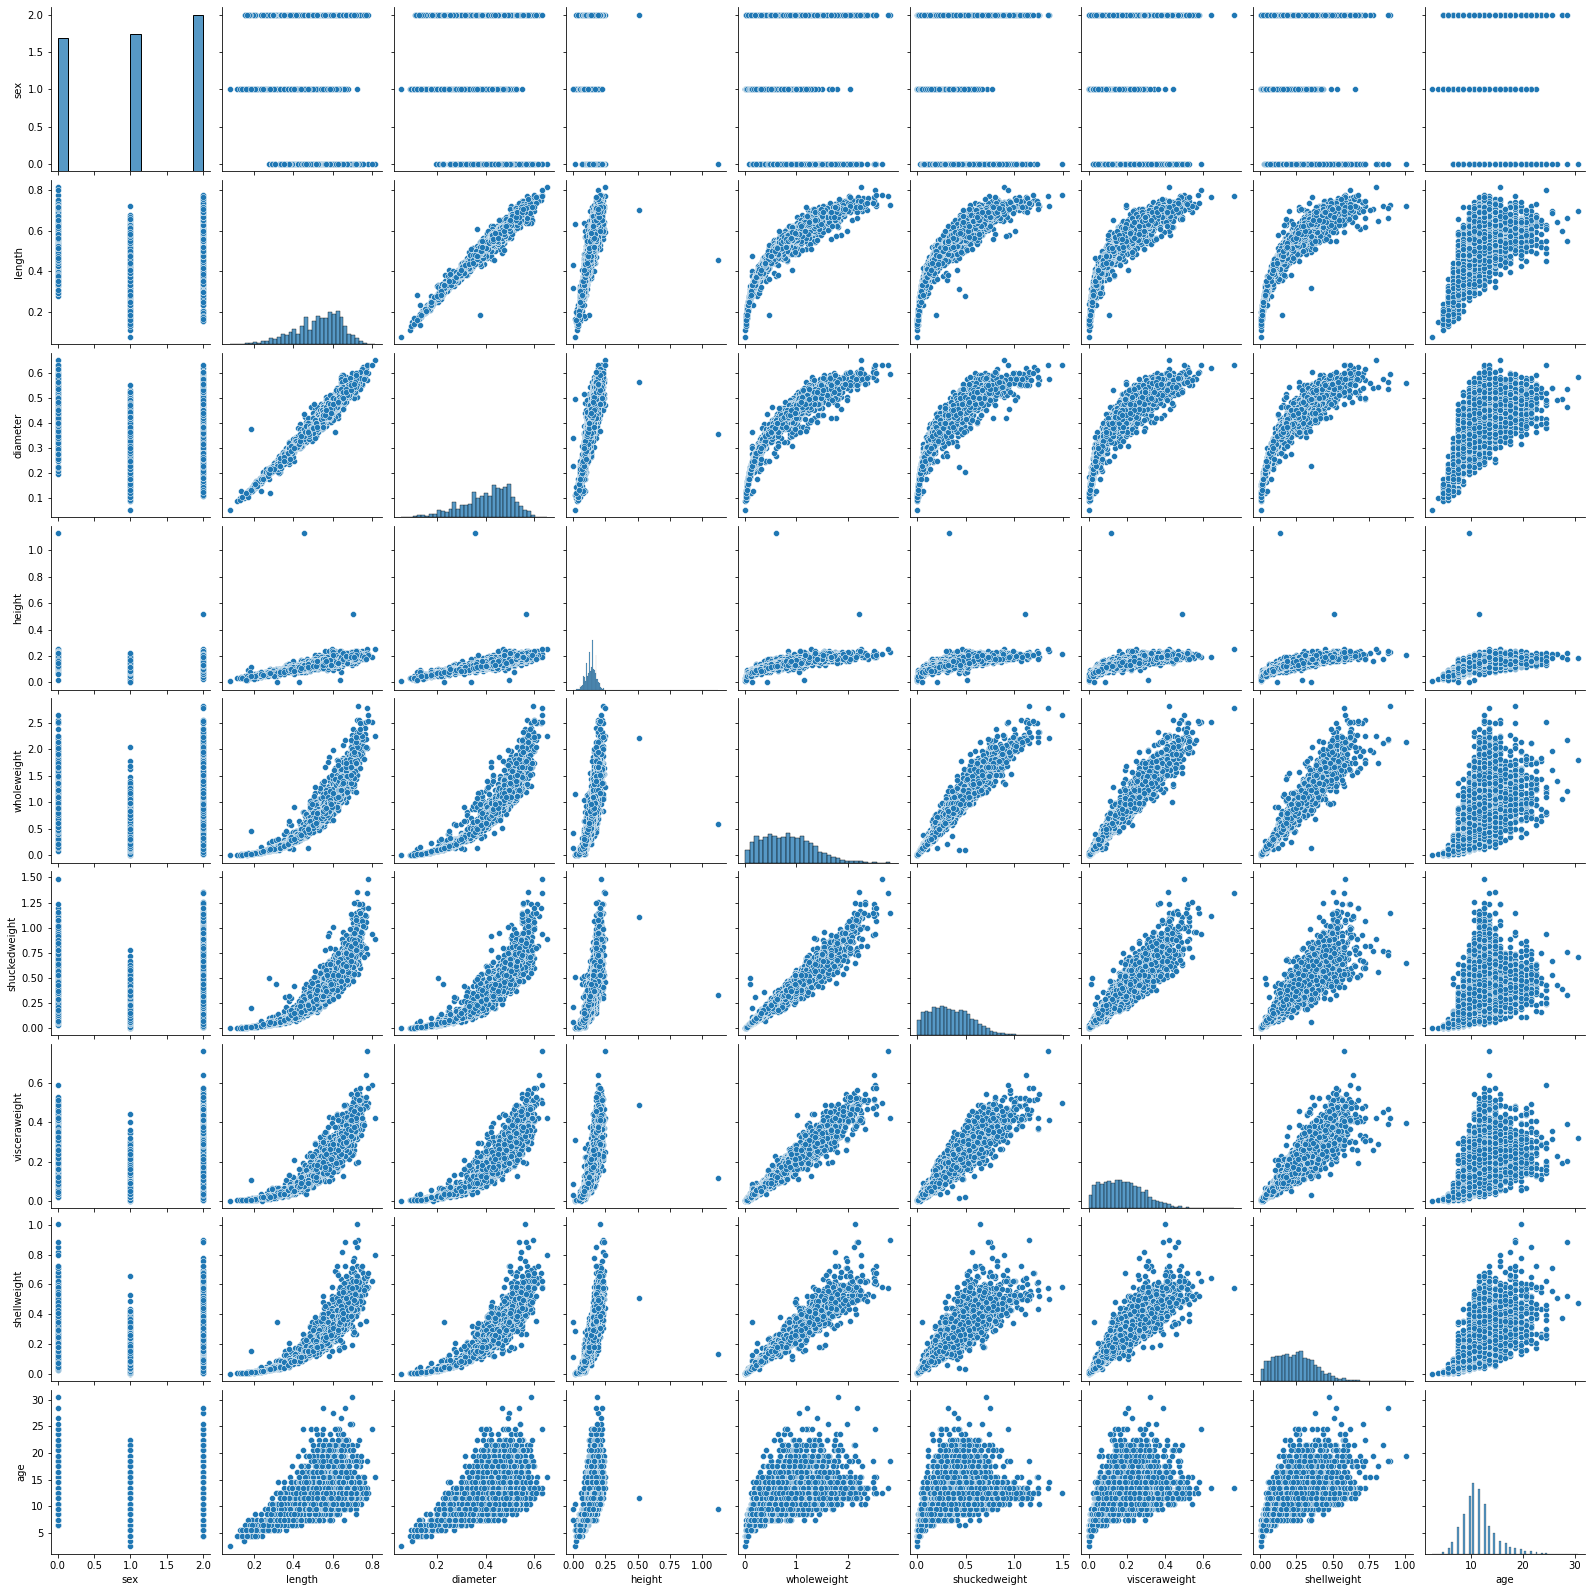

In [46]:
sns.pairplot(df)

In [72]:
def univariate_outlier(x):
    q1 = df[x].describe().T["25%"]
    q3 = df[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    pos=[]
    for i,j in df[x].iteritems():
        if inner<j<outer:
            pass
        else:
            pos.append(i)
            out.append(j)
    return pos, out

In [87]:
L1=univariate_outlier('length')
L1

([148,
  149,
  236,
  237,
  238,
  239,
  305,
  306,
  321,
  465,
  523,
  525,
  526,
  611,
  694,
  696,
  718,
  719,
  720,
  1053,
  1054,
  1055,
  1056,
  1210,
  1429,
  1824,
  1986,
  1987,
  2114,
  2115,
  2169,
  2171,
  2343,
  2371,
  2380,
  2381,
  2458,
  2711,
  3141,
  3143,
  3190,
  3318,
  3380,
  3472,
  3600,
  3837,
  3899,
  3902,
  3994],
 [0.175,
  0.17,
  0.075,
  0.13,
  0.11,
  0.16,
  0.2,
  0.165,
  0.19,
  0.175,
  0.2,
  0.175,
  0.155,
  0.195,
  0.165,
  0.155,
  0.18,
  0.15,
  0.16,
  0.185,
  0.195,
  0.195,
  0.2,
  0.185,
  0.14,
  0.185,
  0.135,
  0.16,
  0.13,
  0.18,
  0.165,
  0.19,
  0.17,
  0.18,
  0.175,
  0.155,
  0.2,
  0.19,
  0.18,
  0.2,
  0.2,
  0.165,
  0.19,
  0.165,
  0.175,
  0.17,
  0.14,
  0.16,
  0.185])

<AxesSubplot:xlabel='length', ylabel='count'>

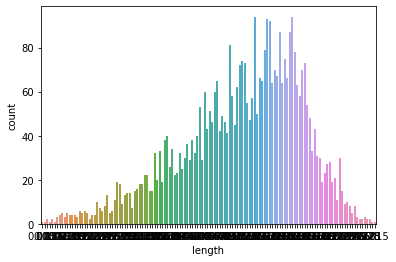

In [79]:
sns.countplot(x='length',data=df)

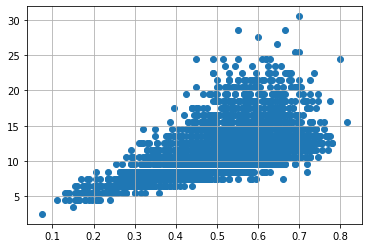

In [85]:
plt.scatter(x='length',data=df,y='age')
plt.grid()

# Skewness of the Variables

In [104]:
df.skew().sort_values(ascending = False)

height           3.166364
age              1.113754
shuckedweight    0.718735
shellweight      0.621081
visceraweight    0.591455
wholeweight      0.530549
sex             -0.098224
diameter        -0.610182
length          -0.640993
dtype: float64

# ANALYSIS:

Skewness is close to 0 for Normal distribution curve.
Height has the highest skewness of 3.17.
May be there are outliers in height, we need to check that and remove them before modeling.
Will check the coorelation with the dependent variable (Rings)
Will use IQR algorithm to remove outliers.

# correaltion

<AxesSubplot:>

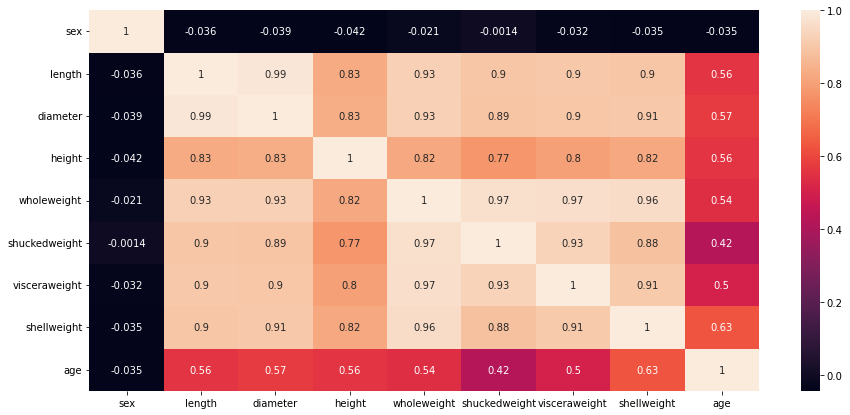

In [71]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot = True)


# highly correlated variables to be removed.

In [ ]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop:\n", columns_to_drop)

# DROP COLUMNS

In [ ]:
df.drop(columns_to_drop, axis=1, inplace = True)

In [ ]:
df.head()

# Variance Inflation Factor

In [ ]:
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sma.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [ ]:
temp = df.drop('sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)

In [14]:
x=np.random.rand(5)
x

array([0.11542747, 0.06723537, 0.89263465, 0.87797655, 0.89412054])

<AxesSubplot:ylabel='Density'>

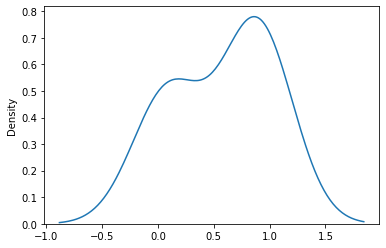

In [15]:
sns.kdeplot(x)

In [16]:
y=(0.1707,0.256,0.9146,1)